In [2]:
%pip install  pandas-datareader
from pandas_datareader import data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
goog = data.DataReader('yahoo', start='2004', end='2016', data_source='yahoo')

TypeError: string indices must be integers

<Axes: xlabel='DATE'>

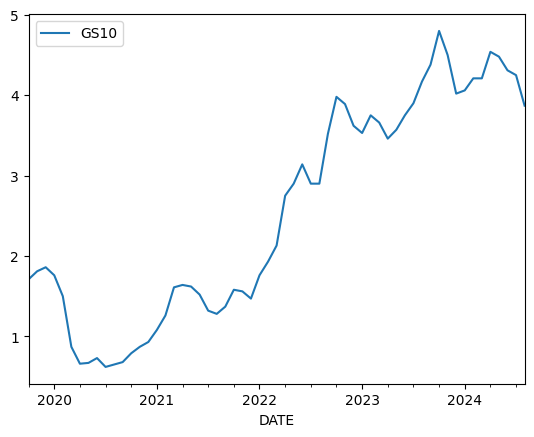

In [8]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10').plot()

<Axes: xlabel='DATE'>

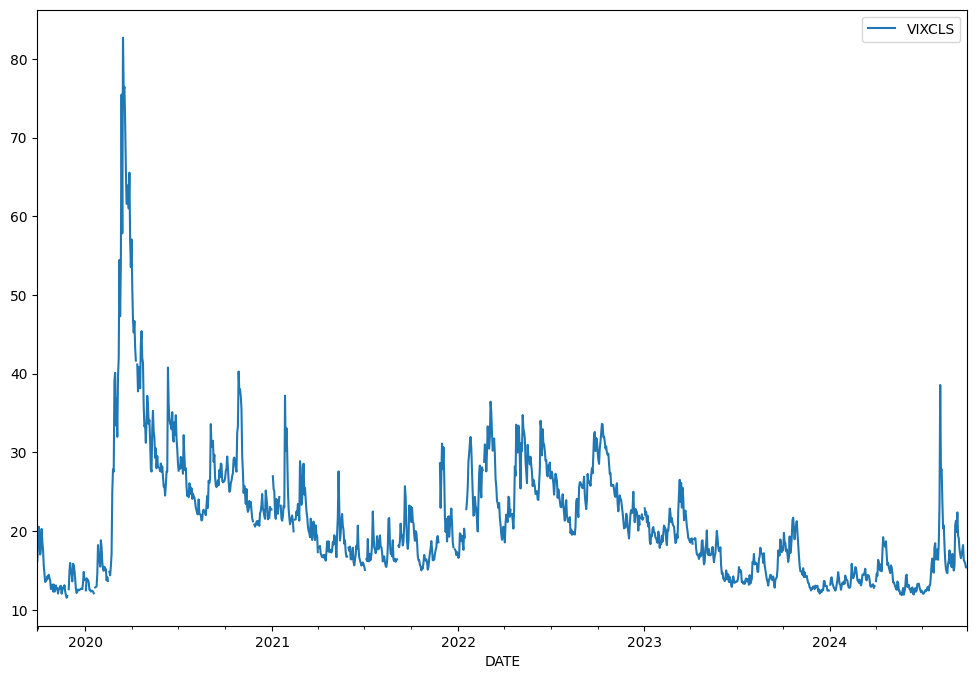

In [11]:
import pandas_datareader as pdr
pdr.get_data_fred("VIXCLS").plot(figsize=(12,8))

In [15]:
vix

,VIXCLS
DATE,
2019-09-30,16.24
2019-10-01,18.56
2019-10-02,20.56
2019-10-03,19.12
2019-10-04,17.04
...,...
2024-09-20,16.15
2024-09-23,15.89
2024-09-24,15.39


In [21]:
type(vix)

pandas.core.frame.DataFrame

<Axes: xlabel='DATE'>

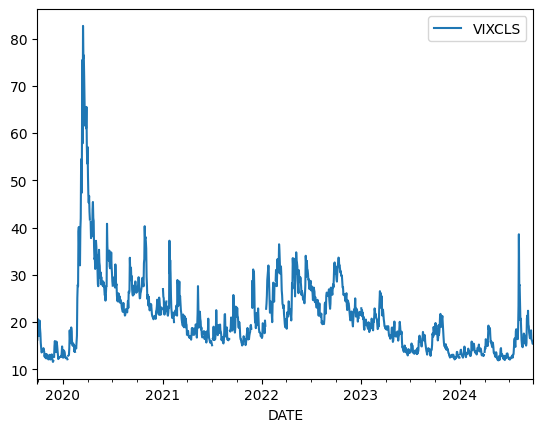

In [25]:
vix.plot()

In [12]:
%pip install morningstar_data;
import morningstar_data as md;

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
md.direct.lookup.companies("Energy")

CredentialsException: Please set up MD_AUTH_TOKEN environment variable to access the morningstar_data package

In [48]:
%pip install yahoo_fin;

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from yahoo_fin.stock_info import get_data, tickers_sp500, tickers_nasdaq, tickers_other, get_quote_table;

msft = get_data('msft' , start_date = '01/01/1999')

In [16]:
msft.head()

,open,high,low,close,adjclose,volume,ticker
1999-01-04,34.902344,36.31250,34.843750,35.25000,21.734926,69305200,MSFT
1999-01-05,35.468750,37.00000,35.359375,36.62500,22.582750,64281600,MSFT
1999-01-06,37.375000,37.87500,36.687500,37.81250,23.314955,69064800,MSFT
1999-01-07,37.437500,37.65625,37.062500,37.62500,23.199360,51150400,MSFT
1999-01-08,38.046875,38.12500,36.750000,37.46875,23.102997,50244800,MSFT


In [17]:
msft_close= msft["close"]

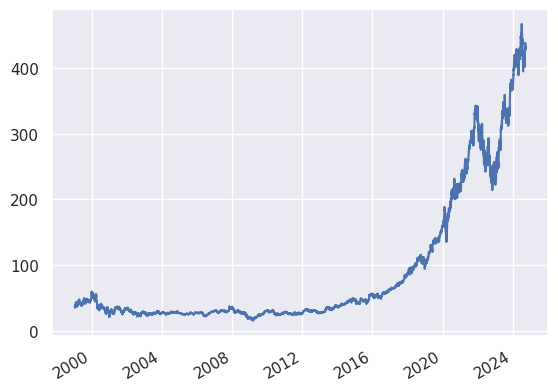

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
msft_close.plot();

In [ ]:
Resampling and converting frequencies

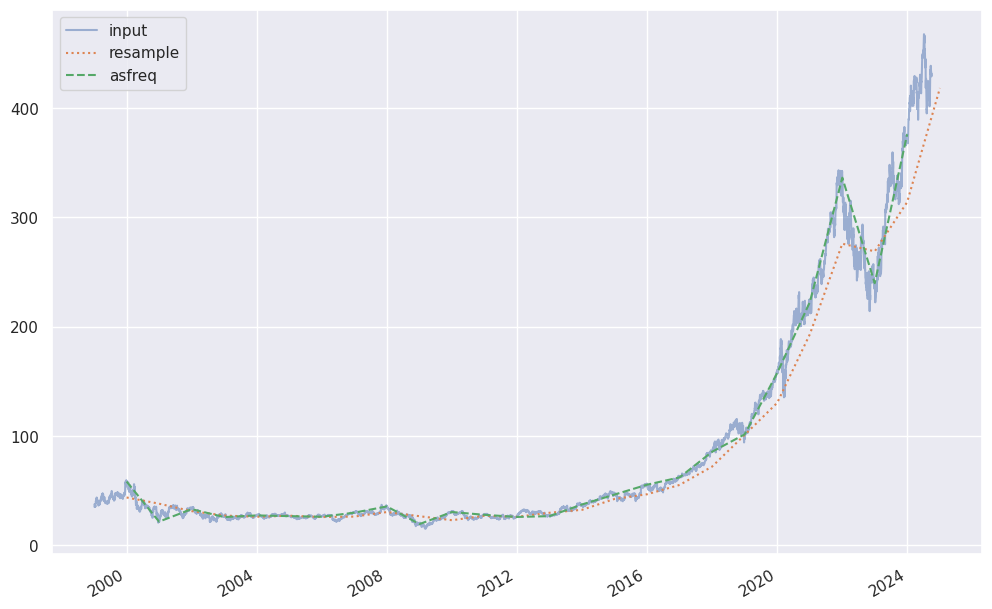

In [54]:
msft_close.plot(alpha=0.5, style='-', figsize=(12,8))
msft_close.resample('BA').mean().plot(style=':')
msft_close.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

In [57]:
 msft_close.iloc[:10]

1999-01-04    35.250000
1999-01-05    36.625000
1999-01-06    37.812500
1999-01-07    37.625000
1999-01-08    37.468750
1999-01-11    36.875000
1999-01-12    35.546875
1999-01-13    35.953125
1999-01-14    35.437500
1999-01-15    37.437500
Name: close, dtype: float64

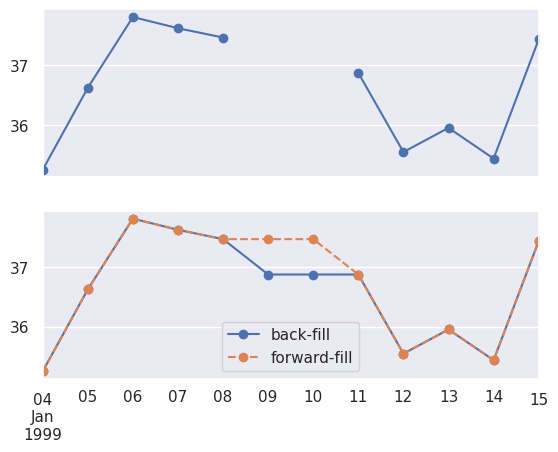

In [58]:
fig, ax = plt.subplots(2, sharex=True)
data = msft_close.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

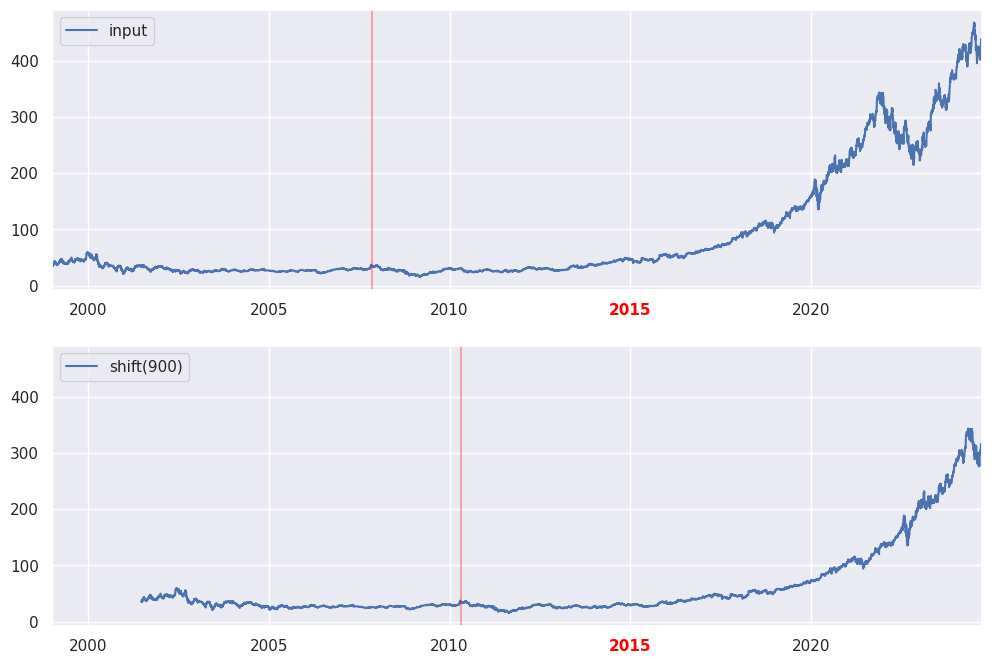

In [66]:
fig, ax = plt.subplots(2, sharey=True, figsize=(12,8))
# apply a frequency to the data
msft = msft_close.asfreq('D', method='pad')
msft.plot(ax=ax[0])
msft.shift(900).plot(ax=ax[1])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')


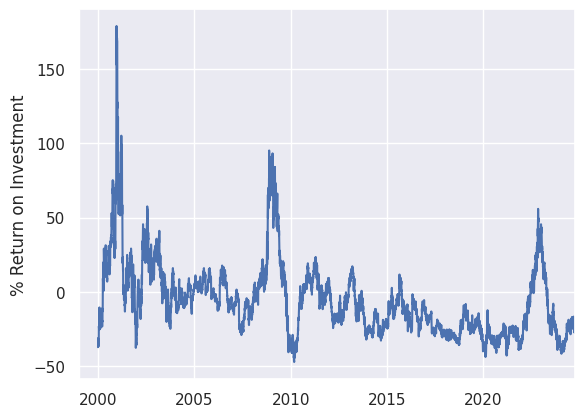

In [68]:
ROI = 100 * (msft.shift(365) / msft - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

In [ ]:
Rolling windows

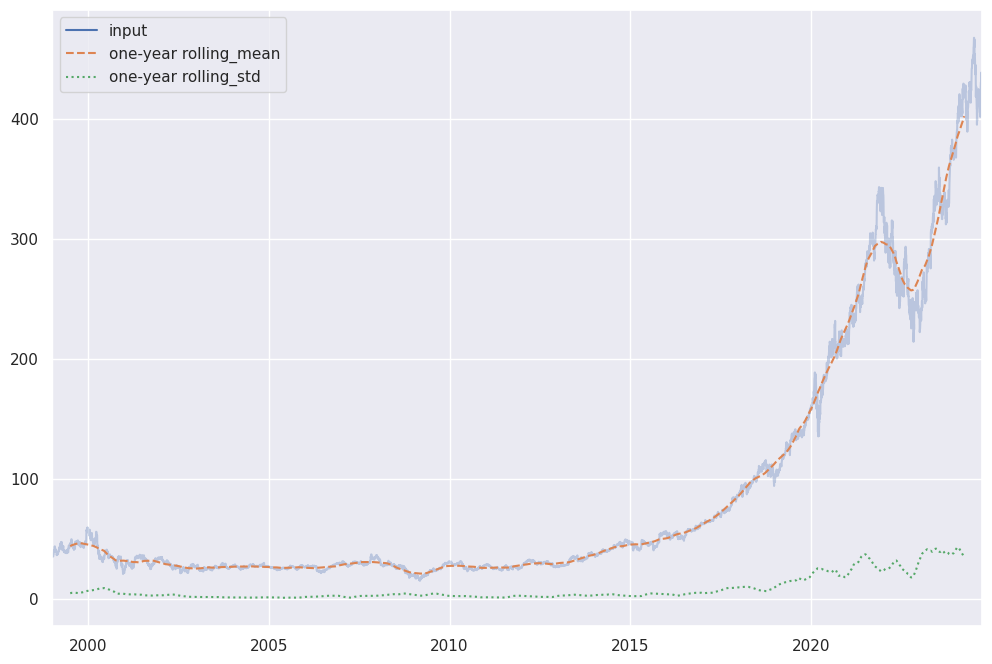

In [70]:
rolling = msft.rolling(365, center=True)
data = pd.DataFrame({'input': msft,
'one-year rolling_mean': rolling.mean(),
'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'],figsize=(12,8))
ax.lines[0].set_alpha(0.3)